## Supplementary figure: percolation of defects

In [6]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
#
move_to_rootf(print_tf=True)
plt.style.use('nb/nb_plotsheet.mplstyle')
#
col1 = plt.cm.twilight(0.2)
col2 = plt.cm.twilight(0.65)
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
figpath = "data/plot/paper/suppinf/"

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


### Single flip squared
- todo: check dynamics coincide with eignstate

In [3]:
# .trash
# latt = Lattice2D(side1=16, 
#                  geo='squared', 
#                  pbc=True)
# latt.flip_sel_edges(latt.neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H)
# latt.compute_k_eigvV()
# G_edges_ww = latt.G.edges(data='weight')

# col1 = plt.cm.twilight(0.2)
# col2 = plt.cm.twilight(0.65)

# edgecol = ['lightblue' if e[2] > 0 else 'red' for e in G_edges_ww]
# #
# fig, ax = plt.subplots(figsize=(5, 5))
# ax.set_aspect('equal');
# cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
# custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)

# kwnxdraw = dict(ax=ax, pos=latt.posG,
#                 cmap=custom_cmap,
#                 edge_color=edgecol, 
#                 node_size=100, 
#                 node_color=-np.abs(latt.eigV[0]), 
#                 width=2)

# nx.draw(latt.G, **kwnxdraw)
# fig.savefig(f"{figpath}{latt.geo}_singleflip.pdf", 
#             bbox_inches='tight', transparent=True, pad_inches=0)
# plt.close('all')

In [4]:
lattices = {}
geometry = 'squared'
cell = 'single'
sizes = 2**np.arange(3, 10)
#
for side in sizes:
    lattices[side] = Lattice2D(#
        side1 = side,
        geo = geometry,
        sgpath='plot/paper/suppinf/'
    )
    if cell == 'single':
        flipdict = lattices[side].neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H
    elif cell == 'square':
        ff = list(lattices[side].neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H.keys())[0][1]
        flipdict = lattices[side].neg_weights_dict.get_neg_weights_dict_h_square(ff)
    lattices[side].flip_sel_edges(flipdict)
    #
    eigvpath = f"{lattices[side].lrgsgpath}eigV0_{cell}.npy"
    #
    if os.path.exists(eigvpath):
        print(f"reading {side}", end="\r")
        setattr(lattices[side], 'eigV', np.load(eigvpath))
        continue
    else:
        print(f"computing {side}", end="\r")
        lattices[side].compute_k_eigvV()
        with open(eigvpath, 'wb') as f:
            np.save(f, np.abs(lattices[side].eigV))

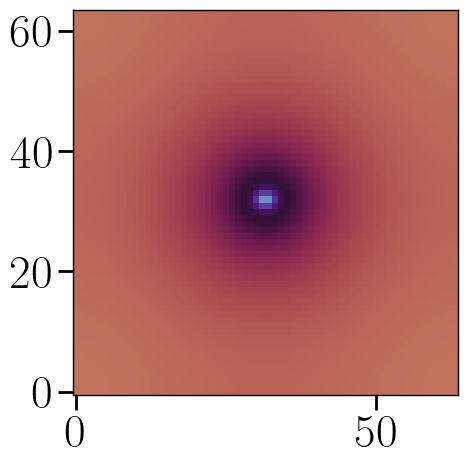

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal');

im = ax.imshow(unravel_1d_to_2d_nodemap(lattices[sizes[3]].eigV[0], lattices[sizes[3]].invnode_map), cmap=custom_cmap)
# ax.axis('off')

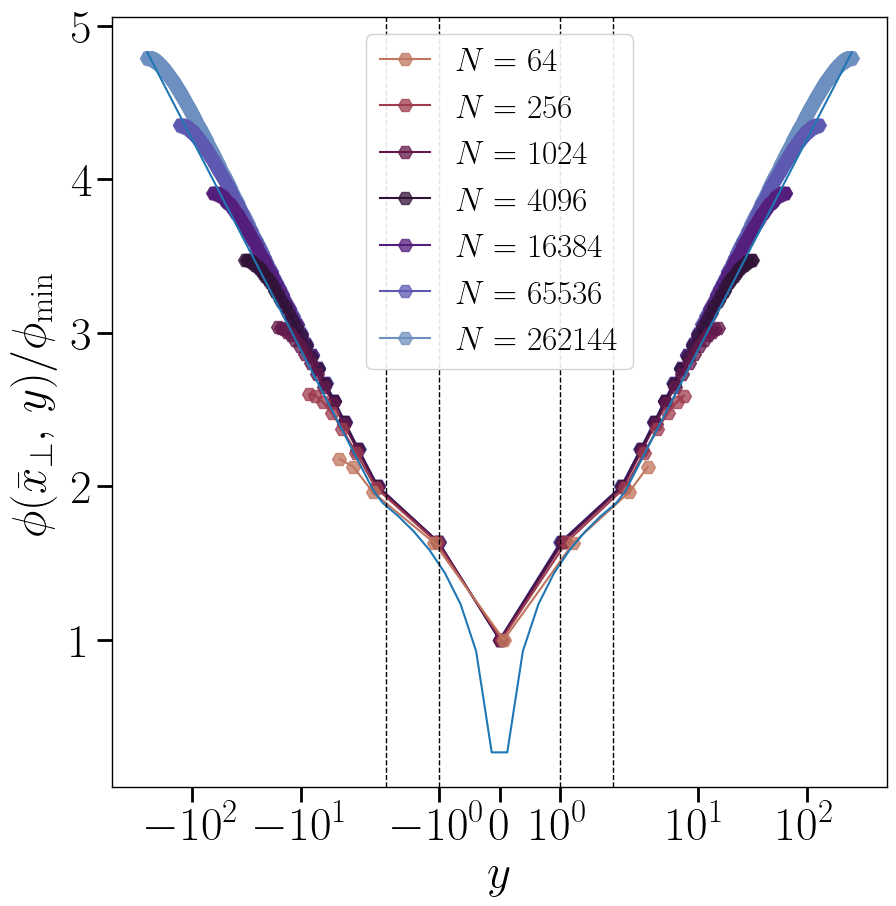

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
#
ax.set_ylabel(r'${\phi(x,\, \bar{y}_\parallel)}/{\phi_{\min}}$', labelpad=10)
ax.set_xlabel(r'$x$')
ax.set_xscale('symlog')
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
for side, c in zip(sizes[::-1], custom_cmap(np.linspace(0, 1, len(sizes)))):
    kwdict = {"ls": '-',
              'c': c, 
              'marker': 'H', 
              'ms': 10, 
              'mfc': set_alpha_torgb(c, 0.75), 
              'label': fr"$N={side**2}$"}  
    eigen_state = flip_to_positive_majority(lattices[side].eigV[0].reshape(lattices[side].syshape))
    phi_plot = (eigen_state/np.min(eigen_state))[:, lattices[side].side1//2]
    x = np.linspace(-side//2, side//2, num=len(phi_plot))
    ax.plot(x, phi_plot, **kwdict)
#
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, fontsize=24)
#
kwvlines = {'ls':'--', 'lw':1, 'c':'k'}
for i in [-1, +1, -lattices[sizes[0]].r_c, +lattices[sizes[0]].r_c]:
    ax.axvline(i, **kwvlines)
#
fig.savefig(f"{figpath}{lattices[sizes[0]].geo}_singleflip_para.pdf", bbox_inches='tight', transparent=True)
plt.close('all')

fig, ax = plt.subplots(figsize=(10, 10))
#
ax.set_ylabel(r'${\phi(\bar{x}_\perp,\, y)}/{\phi_{\min}}$', labelpad=10)
ax.set_xlabel(r'$y$')
ax.set_xscale('symlog')
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
for side, c in zip(sizes[::-1], custom_cmap(np.linspace(0, 1, len(sizes)))):
    kwdict = {"ls": '-',
              'c': c, 
              'marker': 'H', 
              'ms': 10, 
              'mfc': set_alpha_torgb(c, 0.75), 
              'label': fr"$N={side**2}$"}  
    eigen_state = np.abs(lattices[side].eigV[0].reshape(lattices[side].syshape))
    phi_plot = (eigen_state/np.min(eigen_state))[lattices[side].side1//2, :]
    x = np.linspace(-side//2, side//2, num=len(phi_plot))-.5
    ax.plot(x, phi_plot, **kwdict)
x = np.linspace(-sizes[-1]//2, sizes[-1]//2, num=2000)
ax.plot(x, .6*np.log(np.abs(x))+1.5)
#
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, fontsize=24)
#
kwvlines = {'ls':'--', 'lw':1, 'c':'k'}
for i in [-1, +1, -lattices[sizes[0]].r_c, +lattices[sizes[0]].r_c]:
    ax.axvline(i, **kwvlines)
#
fig.savefig(f"{figpath}{lattices[sizes[0]].geo}_singleflip_perp.pdf", bbox_inches='tight', transparent=True)
# plt.close('all')

### Single flip triangle

In [ ]:
side1 = 5
latt = Lattice2D(side1 = side1,
                 geo='triangular',
                 pbc=False)

latt.flip_sel_edges(latt.neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H)
# latt.flip_random_fract_edges()

G_edges_ww = latt.G.edges(data='weight')
edgecol = ['lightblue' if e[2] > 0 else 'r' for e in G_edges_ww]
latt.compute_k_eigvV()

custom_colormap = create_custom_colormap('red', 'lightblue', 256)

metrics = latt.eigV[0]

norm = plt.Normalize(vmin=metrics.min(), vmax=metrics.max())

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal');
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)

kwnxdraw = dict(ax=ax, pos=latt.posG,
                cmap=custom_cmap,
                edge_color=edgecol, 
                node_size=60, 
                node_color=-np.abs(latt.eigV[0]), 
                width=2)

nx.draw(latt.G, **kwnxdraw)
fig.savefig(f"{figpath}{latt.geo}_singleflip.pdf", 
            bbox_inches='tight', transparent=True, pad_inches=0)
# # Create a colorbar
# sm = plt.cm.ScalarMappable(cmap=custom_colormap, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label('Metric Value', rotation=270, labelpad=20)

In [44]:
lattices = {}
geometry = 'triangular'
cell = 'single'
sizes = 2**np.arange(3, 8)
#
for side in sizes:
    lattices[side] = Lattice2D(#
        side1 = side,
        geo = geometry,
        sgpath='plot/paper/suppinf/'
    )
    if cell == 'single':
        flipdict = lattices[side].neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H
    elif cell == 'triangle':
        ff = list(lattices[side].neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H.keys())[0][1]
        flipdict = lattices[side].neg_weights_dict.get_neg_weights_dict_h_triangle(ff)
    lattices[side].flip_sel_edges(flipdict)
    #
    eigvpath = f"{lattices[side].lrgsgpath}eigV0_{cell}.npy"
    #
    if os.path.exists(eigvpath):
        print(f"reading {side}", end="\r")
        setattr(lattices[side], 'eigV', np.load(eigvpath))
        continue
    else:
        print(f"computing {side}", end="\r")
        lattices[side].compute_k_eigvV()
        with open(eigvpath, 'wb') as f:
            np.save(f, np.abs(lattices[side].eigV))

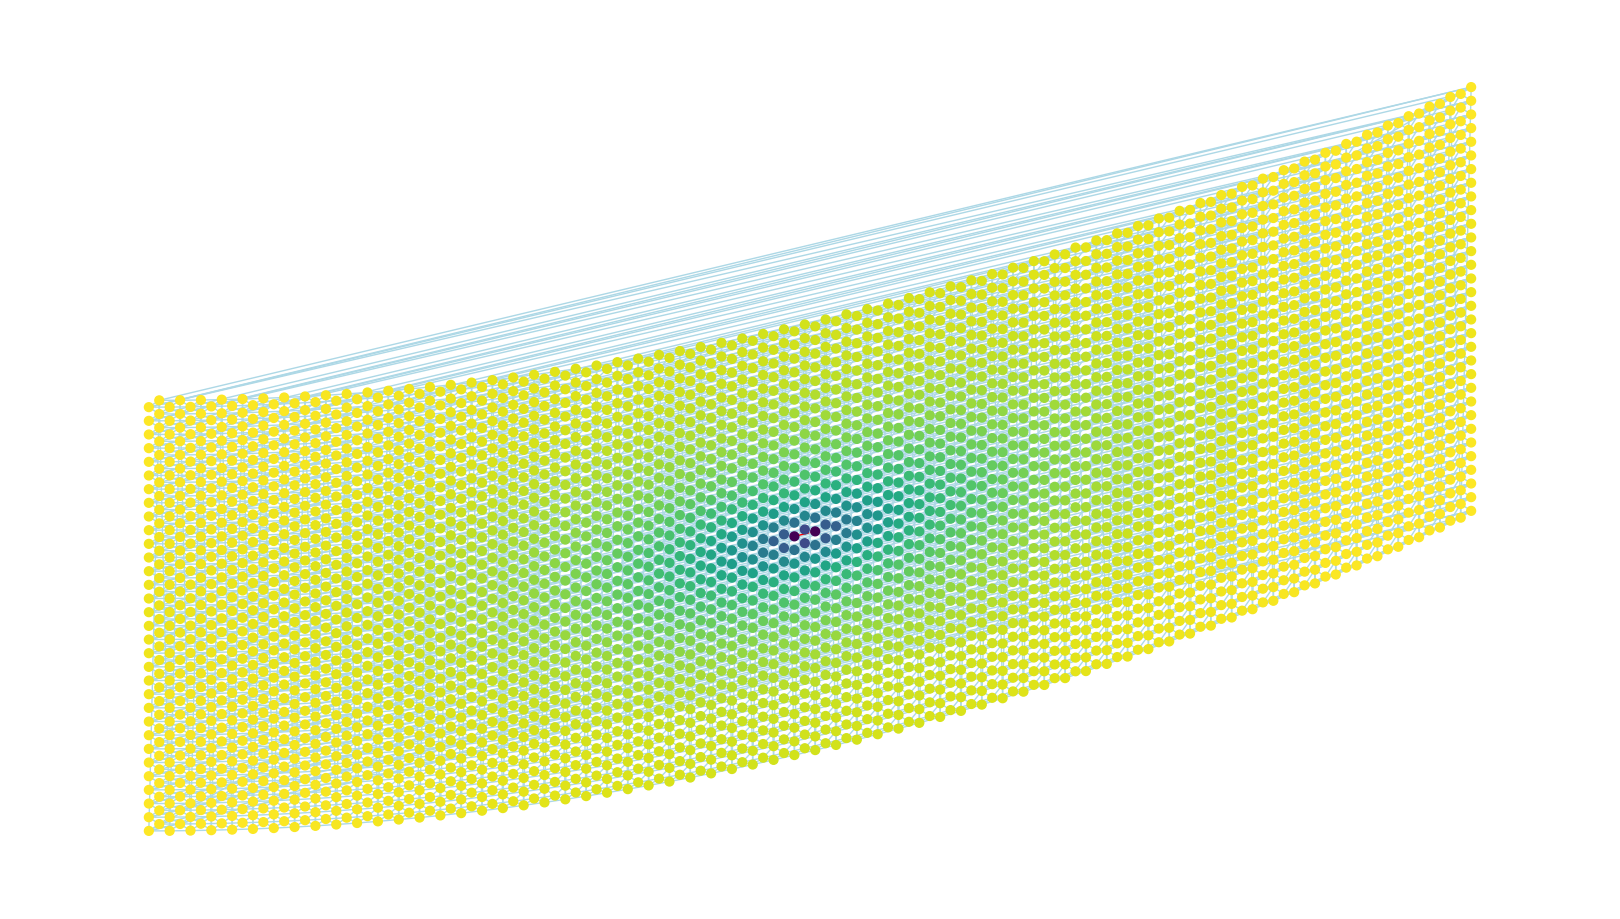

In [45]:
side = 64
G = lattices[side].G
node_color = lattices[side].eigV[0]
edge_color = ['lightblue' if e[2] > 0 else 'red' for e in G.edges(data='weight')]
#
nx.draw(G, pos = nx.get_node_attributes(G, 'pos'), 
        edge_color=edge_color, node_color=node_color, node_size=40)

In [46]:
# def nodelist_mkr(lattice, cent = None):
#     inc = 0
#     inc2 = 0
#     if not cent:
#         cent = lattice.invnode_map[list(lattice.neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H.keys())[0][0]]
#     nodelist = [cent]
#     for i in range(1, lattice.side1//2):
#         if i % 2:
#             inc += 1
#         else:
#             inc2 += 1
#         add = inc
#         addv = inc2
#         nodedown = (cent[0] + add, cent[1] - i)
#         nodeup = (cent[0] - addv, cent[1] + i)
#         nodelist.append(nodeup)
#         nodelist.append(nodedown)
#     nodelist = [[i[0], i[1]] for i in sorted(nodelist, key=lambda x: x[1])]
#     return np.array(nodelist)
# nodelist_mkr(lattices[16], (5, 5))

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))
#
ax.set_ylabel(r'${\phi(x,\, \bar{y}_{\parallel})}/{\phi_{\min}}$', labelpad=10)
ax.set_xlabel(r'$x$')
ax.set_xscale('symlog')
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
r_c = lattices[side].r_c
#
for side, c in zip(sizes[::-1], custom_cmap(np.linspace(0, 1, len(sizes)))):
    kwdict = {"ls": '-',
              'c': c, 
              'marker': 'H', 
              'ms': 10, 
              'mfc': set_alpha_torgb(c, 0.75), 
              'label': fr"$N={side**2}$"}
    eigen_state = unravel_1d_to_2d_nodemap(np.abs(lattices[side].eigV[0]), lattices[side].invnode_map)
    

    phi_plot = (eigen_state/np.min(eigen_state))[lattices[side].side1//2, :]#[indices[:, 0], indices[:, 1]]#[lattices[side].side1//2, :]
    x = np.linspace(-side//2, side//2, num=len(phi_plot))
    ax.plot(x, phi_plot, **kwdict)
#
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, fontsize=24)
#
kwvlines = {'ls':'--', 'lw':1, 'c':'k'}
for i in [-1, +1, -r_c, +r_c]:
    ax.axvline(i, **kwvlines)
#
fig.savefig(f"{figpath}{lattices[sizes[0]].geo}_singleflip_para.pdf", bbox_inches='tight', transparent=True)
plt.close('all')

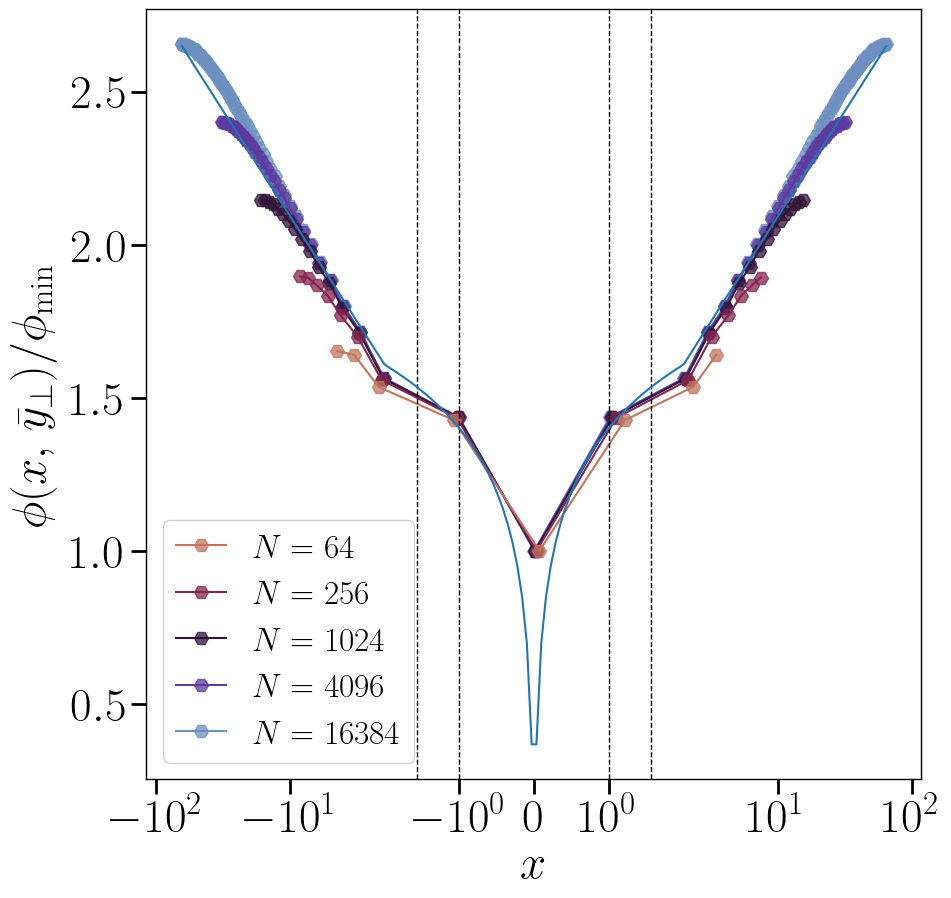

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))
#
ax.set_ylabel(r'${\phi(x,\, \bar{y}_{\perp})}/{\phi_{\min}}$', labelpad=10)
ax.set_xlabel(r'$x$')
ax.set_xscale('symlog')
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
r_c = lattices[side].r_c
#
for side, c in zip(sizes[::-1], custom_cmap(np.linspace(0, 1, len(sizes)))):
    kwdict = {"ls": '-',
              'c': c, 
              'marker': 'H', 
              'ms': 10, 
              'mfc': set_alpha_torgb(c, 0.75), 
              'label': fr"$N={side**2}$"}
    eigen_state = unravel_1d_to_2d_nodemap(np.abs(lattices[side].eigV[0]), lattices[side].invnode_map)
    

    phi_plot = (eigen_state/np.min(eigen_state))[:,lattices[side].side2//2]#[indices[:, 0], indices[:, 1]]#[lattices[side].side1//2, :]
    x = np.linspace(-side//2, side//2, num=len(phi_plot))-.5
    ax.plot(x, phi_plot, **kwdict)
#
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, fontsize=24)
#
kwvlines = {'ls':'--', 'lw':1, 'c':'k'}
for i in [-1, +1, -r_c, +r_c]:
    ax.axvline(i, **kwvlines)
#
    
x = np.linspace(-sizes[-1]//2, sizes[-1]//2, num=2000)
ax.plot(x, .3*np.log(np.abs(x))+1.4)

fig.savefig(f"{figpath}{lattices[sizes[0]].geo}_singleflip_perp.pdf", bbox_inches='tight', transparent=True)
# plt.close('all')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
#
ax.set_ylabel(r'${\phi(x,\, y=L/2)}/{\phi_{\min}}$', labelpad=10)
ax.set_xlabel(r'$x$')
ax.set_xscale('symlog')
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
for side, c in zip(sizes[::-1], custom_cmap(np.linspace(0, 1, len(sizes)))):
    kwdict = {"ls": '-',
              'c': c, 
              'marker': 'H', 
              'ms': 10, 
              'mfc': set_alpha_torgb(c, 0.75), 
              'label': fr"$N={lattices[side].N}$"}  
    eigen_state = np.abs(lattices[side].eigV[0].reshape(lattices[side].syshape))
    phi_plot = (eigen_state)[lattices[side].side1//2-2, :]
    phi_plot /= np.min(phi_plot)
    
    x = np.linspace(-side//2, side//2, num=len(phi_plot))
    x -=  x[np.argmin(phi_plot)]+.55
    print(phi_plot, np.argmin(phi_plot), x[np.argmin(phi_plot)])
    ax.plot(x, phi_plot, **kwdict)
#
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, fontsize=24)
#
kwvlines = {'ls':'--', 'lw':1, 'c':'k'}
for i in [-1, +1, -lattice.r_c, +lattice.r_c]:
    ax.axvline(i, **kwvlines)
#
# fig.savefig(f"{figpath}{lattices[sizes[0]].geo}_singleflip.pdf", bbox_inches='tight', transparent=True)
# plt.close('all')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib as mpl

def plot_square_lattice(
    ax,
    size: int = 7,
    kwargs_nodes: dict = dict(marker="o", ms=20, mec="k", mfc="w"),
    kwargs_extl: dict = dict(ls=":"),
    etxl_len: float = 0.75,
    kwargs_lines: dict = dict(lw=3),
    pec="blue",
    cpec="red",
):
    """
    Function to plot a square lattice where the color and style of each link
    can be controlled individually.
    """
    x, y = np.meshgrid(range(size), range(size))

    # Plot lines individually with control over color
    for i in range(size):
        for j in range(size):
            # Vertical lines
            if i < size - 1:
                line_color = determine_line_color(i, j, "vertical", pec, cpec)
                plot_line_with_style(ax, [x[i, j], x[i + 1, j]], [y[i, j], y[i + 1, j]], line_color, kwargs_lines, cpec)
            
            # Horizontal lines
            if j < size - 1:
                line_color = determine_line_color(i, j, "horizontal", pec, cpec)
                plot_line_with_style(ax, [x[i, j], x[i, j + 1]], [y[i, j], y[i, j + 1]], line_color, kwargs_lines, cpec)
            
            # Nodes
            ax.plot(x[i, j], y[i, j], zorder=2, **kwargs_nodes)

    # Add dashed lines on the boundaries with random colors
    add_boundary_lines(ax, size, x, y, etxl_len, kwargs_extl, pec, cpec)

    # Remove axes for a cleaner look
    ax.axis("off")

def determine_line_color(i, j, direction, pec, cpec):
    """
    Function to determine the color of a line based on its position and direction.
    Customize this function to set specific link colors.
    """
    # Example condition to set a specific link's color
    if direction == "vertical" and i == -1 and j == 4:
        return cpec
    elif direction == "horizontal" and i == 2 and j == 2:
        return cpec
    else:
        return pec

def plot_line_with_style(ax, x_coords, y_coords, color, kwargs_lines, cpec):
    """
    Helper function to plot a line with a specific color and optional style.
    """
    kwargs_lines["color"] = color
    if color == cpec:
        with mpl.rc_context({'path.sketch': (5, 15, 1)}):
            ax.plot(x_coords, y_coords, zorder=1, **kwargs_lines)
    else:
        ax.plot(x_coords, y_coords, zorder=1, **kwargs_lines)

def add_boundary_lines(ax, size, x, y, etxl_len, kwargs_extl, pec, cpec):
    """
    Function to add dashed boundary lines around the lattice.
    """
    for i in range(size):
        boundary_color = random.choice([pec, cpec])
        kwargs_extl["color"] = boundary_color
        # Left and right boundaries
        ax.plot([x[i, 0], x[i, 0] - etxl_len], [y[i, 0], y[i, 0]], zorder=0, **kwargs_extl)
        ax.plot([x[i, -1], x[i, -1] + etxl_len], [y[i, -1], y[i, -1]], zorder=0, **kwargs_extl)

        # Top and bottom boundaries
        ax.plot([x[0, i], x[0, i]], [y[0, i], y[0, i] - etxl_len], zorder=0, **kwargs_extl)
        ax.plot([x[-1, i], x[-1, i]], [y[-1, i], y[-1, i] + etxl_len], zorder=0, **kwargs_extl)

fig, ax= plt.subplots(figsize=(5, 5))
ax.set_aspect('equal')
plot_square_lattice(ax, 5)